# Análisis de temperaturas
### Información
La base de datos que se va a analizar proviene de la **RNEAA** límitada a los meses de **Noviembre, Diciembre, Enero, Febrero y Marzo**. Se cuentan con datos desde **1 de Diciembre de 1997 hasta el 30 de Enero de 2018**. Se realizó una validación a los datos, se excluyeron aquellos datos que la diferencia absoluta entre la tmin y tmax sea mayor a 20



## Procesamiento de Información

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
#######################################
# Script que permite el análisis del
dato de temperatura mínima de la RNEAA
# Author: Jorge Mauricio
# Email: jorge.ernesto.mauricio@gmail.com
# Date: 2018-02-01
# Version: 1.0
#######################################
"""
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

/home/jorge/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/jorge/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# funciones
def generarAnio(f):
	return f.split()[0].split('-')[0]

# crear columna mes
def generarMes(f):
	return f.split()[0].split('-')[1]

# crear columna dia
def generarDia(f):
	return f.split()[0].split('-')[2]

# funcion para generar estación meteorologica
def generarEstacion(m,d):
	m = int(m)
	d = int(d)
	if m == 12:
		if d >=21:
			return 'Invierno'
		else:
			return 'Otoño'
	if m == 1:
		return 'Invierno'
	if m == 2:
		return 'Invierno'
	if m == 3:
		if d <= 15:
			return 'Invierno'
		else:
			return 'Primavera'

In [4]:
# read csv
data = pd.read_csv('data/analisis_invierno_5.csv')

/home/jorge/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#info df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130784 entries, 0 to 2130783
Data columns (total 7 columns):
numero      object
nombre      object
longitud    float64
latitud     float64
fecha       object
tmin        float64
tmax        float64
dtypes: float64(4), object(3)
memory usage: 113.8+ MB


In [6]:
# data count
data.count()

numero      2130784
nombre      2130783
longitud    2130783
latitud     2130783
fecha       2130783
tmin        2130783
tmax        2130783
dtype: int64

In [7]:
# eliminar datos nulos
data = data.dropna()

In [8]:
# integridad del DF
data.head()

,numero,nombre,longitud,latitud,fecha,tmin,tmax
0,2,La Mirinda,-102.251778,22.248528,2013-03-01 00:00:00,0.7,19.8
1,2,La Mirinda,-102.251778,22.248528,2013-03-09 00:00:00,11.7,26.6
2,2,La Mirinda,-102.251778,22.248528,2013-03-13 00:00:00,7.9,21.6
3,2,La Mirinda,-102.251778,22.248528,2013-03-15 00:00:00,5.9,22.7
4,2,La Mirinda,-102.251778,22.248528,2013-03-16 00:00:00,3.4,23.2


In [9]:
data['Año'] = data.apply(lambda x: generarAnio(x['fecha']), axis=1)

In [10]:
data['Mes'] = data.apply(lambda x: generarMes(x['fecha']), axis=1)

In [11]:
data['Día'] = data.apply(lambda x: generarDia(x['fecha']), axis=1)

In [12]:
# integridad db
data.head()

,numero,nombre,longitud,latitud,fecha,tmin,tmax,Año,Mes,Día
0,2,La Mirinda,-102.251778,22.248528,2013-03-01 00:00:00,0.7,19.8,2013,03,01
1,2,La Mirinda,-102.251778,22.248528,2013-03-09 00:00:00,11.7,26.6,2013,03,09
2,2,La Mirinda,-102.251778,22.248528,2013-03-13 00:00:00,7.9,21.6,2013,03,13
3,2,La Mirinda,-102.251778,22.248528,2013-03-15 00:00:00,5.9,22.7,2013,03,15
4,2,La Mirinda,-102.251778,22.248528,2013-03-16 00:00:00,3.4,23.2,2013,03,16


In [13]:
data['Estación'] = data.apply(lambda x: generarEstacion(x['Mes'], x['Día']), axis=1)

In [14]:
# estructura bd
data.head()

,numero,nombre,longitud,latitud,fecha,tmin,tmax,Año,Mes,Día,Estación
0,2,La Mirinda,-102.251778,22.248528,2013-03-01 00:00:00,0.7,19.8,2013,03,01,Invierno
1,2,La Mirinda,-102.251778,22.248528,2013-03-09 00:00:00,11.7,26.6,2013,03,09,Invierno
2,2,La Mirinda,-102.251778,22.248528,2013-03-13 00:00:00,7.9,21.6,2013,03,13,Invierno
3,2,La Mirinda,-102.251778,22.248528,2013-03-15 00:00:00,5.9,22.7,2013,03,15,Invierno
4,2,La Mirinda,-102.251778,22.248528,2013-03-16 00:00:00,3.4,23.2,2013,03,16,Primavera


In [15]:
# filtrar información
data = data.loc[data['Estación'] == 'Invierno']

In [16]:
# filtrar información aberrante tmin menor
data = data.loc[data['tmin'] >= -10]

In [17]:
# filtrar información aberrante tmin mayor
data = data.loc[data['tmin'] <= 15]

## Tmin

In [18]:
# media de tmin anual
plt.style.use('ggplot')
data.groupby('Año').mean()['tmin']

Año
1997    3.760000
1998    5.503704
1999    6.392576
2000    7.212903
2001    9.765000
2002    6.364935
2003    7.142339
2004    6.289672
2005    6.912918
2006    7.016932
2007    7.470029
2008    7.762511
2009    8.712177
2010    8.056472
2011    8.123839
2012    8.104146
2013    7.021567
2014    7.324239
2015    7.579147
2016    6.922933
2017    7.449120
2018    6.535907
Name: tmin, dtype: float64

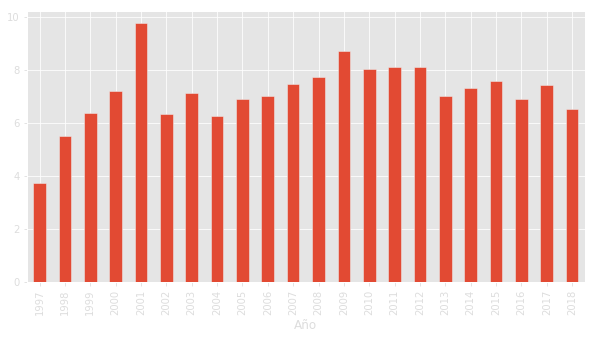

In [19]:
data.groupby('Año').mean()['tmin'].plot.bar(figsize=(10,5))

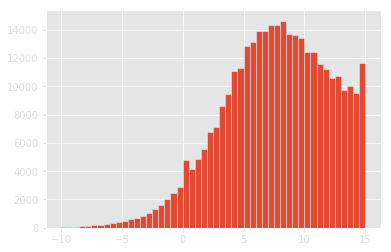

In [20]:
data['tmin'].hist(bins=50)

In [21]:
dataAnio = data.groupby(['longitud','latitud','Año']).mean()['tmin']

In [22]:
dataAnio.head()

longitud     latitud    Año 
-116.860285  32.101629  2015    5.353636
                        2016    7.544625
                        2017    6.793226
                        2018    7.586875
-116.161000  31.252000  2015    2.527273
Name: tmin, dtype: float64

In [23]:
dataAnio.to_csv('data/dataPorUbicacion_Anios_tmin.csv')

In [24]:
dataA = pd.read_csv('data/dataPorUbicacion_Anios_tmin.csv', header=None)

In [25]:
dataA.head()

,0,1,2,3
0,-116.860285,32.101629,2015,5.353636
1,-116.860285,32.101629,2016,7.544625
2,-116.860285,32.101629,2017,6.793226
3,-116.860285,32.101629,2018,7.586875
4,-116.161000,31.252000,2015,2.527273


In [26]:
cols = ['longitud','latitud','Año','Tmin']

In [27]:
dataA.columns = cols

In [28]:
# límites del mapas
LONG_MAX = -86.1010
LONG_MIN = -118.2360
LAT_MAX = 33.5791
LAT_MIN = 12.37

/home/jorge/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:515: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


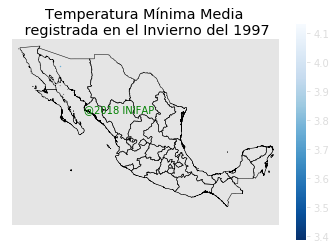

In [29]:
for i in dataA['Año'].unique():
    # configuración del mapas
    plt.clf()
    fig = plt.figure(figsize=(6,4))
    m = Basemap(projection='mill',llcrnrlat=LAT_MIN,urcrnrlat=LAT_MAX,llcrnrlon=LONG_MIN,urcrnrlon=LONG_MAX,resolution='h')

    # filtrar información por años
    dataTemporal = dataA.loc[dataA['Año'] == i]
    x = np.array(dataTemporal['longitud'])
    y = np.array(dataTemporal['latitud'])
    z = np.array(dataTemporal['Tmin'])

    # agregar shapes
    m.readshapefile('shapes/Estados', 'Estados')

    # agregar puntos
    m.scatter(x,y, latlon=True, s=2,c=z, cmap='Blues_r')

    # crear anotación
    latitudAnotacion = (LAT_MAX + LAT_MIN) / 2
    longitudAnotacion = (LONG_MAX + LONG_MIN) / 2
    plt.annotate('@2018 INIFAP', xy=(longitudAnotacion,latitudAnotacion), xycoords='figure fraction', xytext=(0.25,0.55), color='g')
    plt.title("Temperatura Mínima Media\n registrada en el Invierno del {}".format(i))
    plt.colorbar()
    temp = "maps/Tmin_{}.png".format(i)
    plt.savefig(temp, dpi=300)

## Imagenes

![1997](maps/Tmin_1997.png)
![1998](maps/Tmin_1998.png)
![1999](maps/Tmin_1999.png)
![2000](maps/Tmin_2000.png)
![2001](maps/Tmin_2001.png)
![2002](maps/Tmin_2002.png)
![2003](maps/Tmin_2003.png)
![2004](maps/Tmin_2004.png)
![2005](maps/Tmin_2005.png)
![2006](maps/Tmin_2006.png)
![2007](maps/Tmin_2007.png)
![2008](maps/Tmin_2008.png)
![2009](maps/Tmin_2009.png)
![2010](maps/Tmin_2010.png)
![2011](maps/Tmin_2011.png)
![2012](maps/Tmin_2012.png)
![2013](maps/Tmin_2013.png)
![2014](maps/Tmin_2014.png)
![2015](maps/Tmin_2015.png)
![2016](maps/Tmin_2016.png)
![2017](maps/Tmin_2017.png)
![2018](maps/Tmin_2018.png)

## Tmax

In [31]:
# media de tmax anual
data.head()

,numero,nombre,longitud,latitud,fecha,tmin,tmax,Año,Mes,Día,Estación
0,2,La Mirinda,-102.251778,22.248528,2013-03-01 00:00:00,0.7,19.8,2013,03,01,Invierno
1,2,La Mirinda,-102.251778,22.248528,2013-03-09 00:00:00,11.7,26.6,2013,03,09,Invierno
2,2,La Mirinda,-102.251778,22.248528,2013-03-13 00:00:00,7.9,21.6,2013,03,13,Invierno
3,2,La Mirinda,-102.251778,22.248528,2013-03-15 00:00:00,5.9,22.7,2013,03,15,Invierno
174,2,La Mirinda,-102.251778,22.248528,2013-12-21 00:00:00,10.3,20.4,2013,12,21,Invierno


In [36]:
data.groupby("Año").mean()["tmax"]

Año
1997    17.000000
1998    20.633333
1999    21.915721
2000    22.375403
2001    24.755000
2002    21.770707
2003    21.855847
2004    20.279940
2005    21.809418
2006    22.450739
2007    21.792402
2008    23.203600
2009    23.613862
2010    21.585399
2011    23.234937
2012    22.400377
2013    20.915923
2014    22.333743
2015    21.239565
2016    21.455727
2017    22.610332
2018    21.294922
Name: tmax, dtype: float64

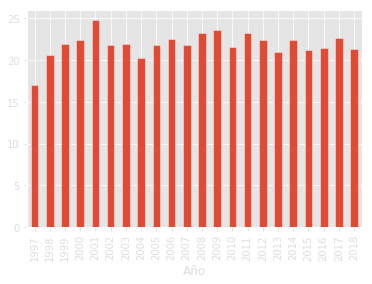

In [37]:
data.groupby("Año").mean()["tmax"].plot.bar()

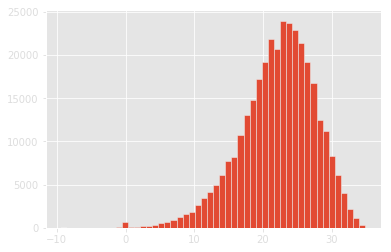

In [38]:
data["tmax"].hist(bins=50)

In [39]:
dataAnio = data.groupby(["longitud", "latitud", "Año"]).mean()["tmax"]

In [40]:
dataAnio.head()

longitud     latitud    Año 
-116.860285  32.101629  2015    17.468182
                        2016    19.970500
                        2017    18.796129
                        2018    21.580937
-116.161000  31.252000  2015    17.072727
Name: tmax, dtype: float64

In [41]:
dataAnio.to_csv("data/dataPorUbicacion_Anios_tmax.csv")

In [42]:
dataA = pd.read_csv("data/dataPorUbicacion_Anios_tmax.csv", header=None)

In [43]:
dataA.head()

,0,1,2,3
0,-116.860285,32.101629,2015,17.468182
1,-116.860285,32.101629,2016,19.970500
2,-116.860285,32.101629,2017,18.796129
3,-116.860285,32.101629,2018,21.580938
4,-116.161000,31.252000,2015,17.072727


In [44]:
cols = ["longitud","latitud","Año","Tmax"]

In [45]:
dataA.columns = cols

In [47]:
# límites del mapas
LONG_MAX = -86.1010
LONG_MIN = -118.2360
LAT_MAX = 33.5791
LAT_MIN = 12.37

/home/jorge/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:515: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


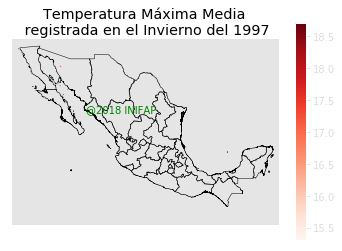

In [49]:
for i in dataA['Año'].unique():
    # configuración del mapas
    plt.clf()
    fig = plt.figure(figsize=(6,4))
    m = Basemap(projection='mill',llcrnrlat=LAT_MIN,urcrnrlat=LAT_MAX,llcrnrlon=LONG_MIN,urcrnrlon=LONG_MAX,resolution='h')

    # filtrar información por años
    dataTemporal = dataA.loc[dataA['Año'] == i]
    x = np.array(dataTemporal['longitud'])
    y = np.array(dataTemporal['latitud'])
    z = np.array(dataTemporal['Tmax'])

    # agregar shapes
    m.readshapefile('shapes/Estados', 'Estados')

    # agregar puntos
    m.scatter(x,y, latlon=True, s=2,c=z, cmap='Reds')

    # crear anotación
    latitudAnotacion = (LAT_MAX + LAT_MIN) / 2
    longitudAnotacion = (LONG_MAX + LONG_MIN) / 2
    plt.annotate('@2018 INIFAP', xy=(longitudAnotacion,latitudAnotacion), xycoords='figure fraction', xytext=(0.25,0.55), color='g')
    plt.title("Temperatura Máxima Media\n registrada en el Invierno del {}".format(i))
    plt.colorbar()
    temp = "maps/Tmax_{}.png".format(i)
    plt.savefig(temp, dpi=300)

![1997](maps/Tmax_1997.png)
![1998](maps/Tmax_1998.png)
![1999](maps/Tmax_1999.png)
![2000](maps/Tmax_2000.png)
![2001](maps/Tmax_2001.png)
![2002](maps/Tmax_2002.png)
![2003](maps/Tmax_2003.png)
![2004](maps/Tmax_2004.png)
![2005](maps/Tmax_2005.png)
![2006](maps/Tmax_2006.png)
![2007](maps/Tmax_2007.png)
![2008](maps/Tmax_2008.png)
![2009](maps/Tmax_2009.png)
![2010](maps/Tmax_2010.png)
![2011](maps/Tmax_2011.png)
![2012](maps/Tmax_2012.png)
![2013](maps/Tmax_2013.png)
![2014](maps/Tmax_2014.png)
![2015](maps/Tmax_2015.png)
![2016](maps/Tmax_2016.png)
![2017](maps/Tmax_2017.png)
![2018](maps/Tmax_2018.png)
